In [65]:
from IPython.display import display, Javascript

display(Javascript("MathJax.typeset()"))


<IPython.core.display.Javascript object>

# Neural Networks

## A mathematical model of a neural network is a collection of neurons that are connected in layers

### A neural network is a collection of neurons that are connected in layers.
- A neural network has an input layer, hidden layers, and an output layer.
- The input layer is the first layer of the neural network.
    - The input layer has neurons that take the input to the neural network.
    - **Note**: The input to the neural network is the data that the network is trained on. \
    Not the data that the network is predicting. The input sits at the beginning of the neurons \
    dendrites and aggregates the input signals via dot product to the nucleus to which we \
    apply an activation function, add the bias and pass the output to the axon terminals of \
    other neurons.
- The hidden layers are the layers between the input and output layers.
- The output layer is the last layer of the neural network.
    - The output layer has neurons that produce the output of the neural network.
    - The output of the neural network is the prediction of the network.

---

### A neural network’s forward pass:
- The forward pass is the process of calculating the output of a neural network given an input.
- The output of the neural network is calculated using the weights and biases of the neurons in the network.
- The output of the neural network is the prediction of the network.
- The prediction of the network is the output of the last layer of neurons.

---

$
\begin{equation*}
L = - \sum_{l=1}^{N} y_l \log \left( \forall_{j=1}^{n_3} \left[ \frac{e^{\sum_{i=1}^{n_2} \max \left(0, \sum_{i=1}^{n_1} \max \left(0, \sum_{i=1}^{n_0} X_i w_{1,i,j} + b_{1,j} \right) w_{2,i,j} + b_{2,j} \right) w_{3,i,j} + b_{3,j}}}
{\sum_{k=1}^{n_3} e^{\sum_{i=1}^{n_2} \max \left(0, \sum_{i=1}^{n_1} \max \left(0, \sum_{i=1}^{n_0} X_i w_{1,i,k} + b_{1,k} \right) w_{2,i,k} + b_{2,k} \right) w_{3,i,k} + b_{3,k}}} \right] \right)  \text{,} \\
\text{where L}  = \text{Loss Function} 
\end{equation*}
$

---

### The Forward Pass can be represented as a series of matrix multiplications 

In [66]:
import numpy as np
from src.functions.activation import Sigmoid


# create the input data
X = np.array([[1.0, 2.0, 3.0, 2.5],
                [2.0, 5.0, -1.0, 2.0],
                [-1.5, 2.7, 3.3, -0.8]])

# create the Expected output data
y = np.array([[0, 1, 0],
                [1, 0, 1],
                [0, 1, 0]])

# create the weights
w1 = np.array([[0.2, 0.8, -0.5, 1.0],
                [0.5, -0.91, 0.26, -0.5],
                [-0.26, -0.27, 0.17, 0.87]])
w2 = np.array([[0.1, -0.14, 0.5],
                [-0.5, 0.12, -0.33],
                [-0.44, 0.73, -0.13]])
w3 = np.array([[-0.1, -0.14, -0.5],
                [0.5, 0.12, -0.33],
                [-0.44, 0.73, -0.13]])

# create the biases
b1 = np.array([2.0, 3.0, 0.5])
b2 = np.array([-1.0, 2.0, -0.5])
b3 = np.array([2.0, 3.0, 0.5])

# create the activation function
sigmoid = Sigmoid()

# calculate the output/loss of the neural network
loss = -np.log(  # cross-entropy loss
    np.sum(  # sum over the output neurons
        y * np.exp(  # element-wise multiplication with the exponential of the output
            np.dot(  # dot product of the output
                np.maximum(  # ReLU activation
                    0,  # ReLU
                    np.dot(  # dot product of the hidden layer
                        np.maximum(  # ReLU activation
                            0,  # ReLU
                            np.dot(  # dot product of the input layer
                                X,  # input data
                                w1.T  # transpose of the weights
                            ) + b1 # add the bias
                        ),  # ReLU
                        w2.T  # transpose of the weights
                    ) + b2  # add the bias
                ),  # ReLU
                w3.T  # transpose of the weights
            ) + b3  # add the bias
        ) /  # divide by the sum of the exponential of the output
        np.sum(  # sum over the output neurons
            np.exp(  # exponential of the output
                np.dot(  # dot product of the output
                    np.maximum(  # ReLU activation
                        0,  # ReLU
                        np.dot(  # dot product of the hidden layer
                            np.maximum(  # ReLU activation
                                0,  # ReLU
                                np.dot(  # dot product of the input layer
                                    X,  # input data
                                    w1.T  # transpose of the weights
                                ) + b1  # add the bias
                            ),  # ReLU
                            w2.T  # transpose of the weights
                        ) + b2  # add the bias
                    ),  # ReLU
                    w3.T  # transpose of the weights
                ) + b3  # add the bias
            ),  # exponential of the output
        axis=1, # sum over the output neurons
        keepdims=True  # keep the dimensions of the output
        ) # sum over the output neurons
    )  # sum over the output neurons
)  # cross-entropy loss

# verify the accuracy of the loss
# assert loss.shape == (3, 3), "The shape of the loss is incorrect"

# print the loss
print(loss)

-0.5631323300324019


# Layer of Neurons

### A layer of neurons is a collection of neurons that take the same number of inputs and produce the same number of outputs.

#### The output of each neuron is calculated as follows:

---

$
\begin{align*}
\text{``Predictions``} &= \text{Activation Function}(\text{weights} \cdot \text{inputs} + \text{Bias}) \\
\text{``Weighted Sum of Inputs w/ Bias``} &= \sigma(\sum_{i=1}^{n} w_i \cdot x_i + b) \\
\text{``Weighted Sum of Inputs w/ Bias``} &= \sigma(w_1 \cdot x_1 + w_2 \cdot x_2 + . . . + w_n \cdot x_n + b)
\end{align*}
$

---

#### The Predictions are the output of the layer of neurons.
- The weights are the weights of the neurons in the layer.
- The inputs are the inputs to the layer.
- The bias is the bias of the neurons in the layer.
- The activation function is the activation function of the neurons in the layer.
- The weighted sum of inputs w/ bias is the weighted sum of the inputs to the layer plus the bias.
- The weighted sum of inputs w/ bias is the dot product of the weights and inputs plus the bias.

#### The output of each neuron is calculated as follows:
- The weighted sum of inputs and bias is calculated.
- The activation function is applied to the weighted sum of inputs and bias.
- The result is the prediction of the neuron.
- The predictions of all the neurons in the layer are returned as a list.
- The output of the layer of neurons is the list of predictions.

#### The output of the layer of neurons is a list of predictions, one for each neuron in the layer.

### Using Dot Product

#### Calculate the weighted sum of inputs and add the bias

---

$
\begin{align*}
\text{Weighted Sum w/ Bias} &= \sum_{i=1}^{n} w_i \cdot x_i + b \\
\text{Weighted Sum w/ Bias} &= w_1 \cdot x_1 + w_2 \cdot x_2 + . . . + w_n \cdot x_n + b
\end{align*}
$

---

```python
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

# calculate the weighted sum of inputs and add the bias for each neuron
output = [
# Neuron 1: 
inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias,
]

predictions = ActivationFunction(output)
```

In the context of binary classification using a sigmoid activation function, a prediction close to "1" typically indicates a positive class, while a prediction close to "0" indicates a negative class. Whether "1" or "0" is considered good or bad depends on the true label of the data point:

- If the true label is "1" (positive class), a prediction close to "1" is good, and a prediction close to "0" is bad.
- If the true label is "0" (negative class), a prediction close to "0" is good, and a prediction close to "1" is bad.



### This example demonstrates how to calculate the output of a layer of neurons using a dot product.

- The input data is a 1x4 matrix. Meaning we have 1 sample with 4 inputs.
- The weights define the number of neurons in the layer. This layer has 3 neurons with 4 inputs each to match your input data.
- The bias is a 1x3 matrix. Meaning we have 3 biases for the 3 neurons in the layer, in the shape of a 1x3 matrix and 1 input per neuron.
- The output of the layer of neurons is a 1x3 matrix. Meaning we have 1 sample with 3 predictions.
- The prediction is a sort of transformation of the output of the neurons in the layer.

$
\begin{align*}
O &= XW^T + B = \begin{bmatrix} 1.0 & 2.0 & 3.0 & 2.5 \end{bmatrix} \begin{bmatrix} 0.2 & 0.5 & -0.26 \\ 0.8 & -0.91 & -0.27 \\ -0.5 & 0.26 & 0.17 \\ 1.0 & -0.5 & 0.87 \end{bmatrix} + \begin{bmatrix} 0.0 & 0.0 & 0.0 \end{bmatrix} \\
O &= \begin{bmatrix} 2.8 & -1.79 & 1.885 \end{bmatrix}
\end{align*}
$

Next, lets take a closer look at this matrix multiplication in algebraic form:

$
\begin{align*}
O &= \begin{bmatrix} 1.0 \cdot 0.2 + 2.0 \cdot 0.8 + 3.0 \cdot -0.5 + 2.5 \cdot 1.0 & 1.0 \cdot 0.5 + 2.0 \cdot -0.91 + 3.0 \cdot 0.26 + 2.5 \cdot -0.5 & 1.0 \cdot -0.26 + 2.0 \cdot -0.27 + 3.0 \cdot 0.17 + 2.5 \cdot 0.87 \end{bmatrix} + \begin{bmatrix} 0.0 & 0.0 & 0.0 \end{bmatrix} \\
O &= \begin{bmatrix} 2.8 & -1.79 & 1.885 \end{bmatrix} + \begin{bmatrix} 0.0 & 0.0 & 0.0 \end{bmatrix} \\
O &= \begin{bmatrix} 2.8 & -1.79 & 1.885 \end{bmatrix}
\end{align*}
$


In [67]:
# Layer of Neurons Example 
import numpy as np
from src.functions.activation import Sigmoid

# initialize the activation function
sigmoid = Sigmoid()

# Create the encoding sample input data
encoded_inputs = np.array(
    # Input sample 1: 1x4 matrix; 4 inputs for 4 neurons
    [1.0, 2.0, 3.0, 2.5]
)
print(f"Encoded Inputs: \n{encoded_inputs}")


# Our weights define the number of neurons in the layer. This 
# layer has 3 neurons with 4 inputs each to match your input data.
# initialize  weights and biases
weights = np.array([
    # Neuron 1: 4 inputs
    [0.2, 0.8, -0.5, 1.0],
    # Neuron 2: 4 inputs
    [0.5, -0.91, 0.26, -0.5],
    # Neuron 3: 4 inputs
    [-0.26, -0.27, 0.17, 0.87]])
print(f"Weights: \n{weights}")

# initialize random bias
# This layer has 4 neurons, so we need 4 biases.
# The bias is a 4x1 matrix. Meaning we have 4 biases for the 4 
# neurons in the layer, in the shape of a 4x1 matrix and 1 input per neuron.
bias  = np.array([[0.0, 0.0, 0.0]])
print(f"Bias: \n{bias}")

# get the weighted sums of the inputs and add the bias
# Here we model the neurons output using sample input data, 
# a vector that is passed to each neuron in the layer.
outputs = np.dot(weights, encoded_inputs) + bias
print(f"Outputs: \n{outputs}") # Outputs: [[2.8, -1.79, 1.885]]

# apply the activation function and get the predictions
# The prediction is a sort of transformation of the output of the 
# neurons in the layer.
predictions = sigmoid(outputs)
print(f"Predictions: \n{predictions}")

# Error
error_rate = 1 - predictions
print(f"Error Ratio: \n{error_rate}")

Encoded Inputs: 
[1.  2.  3.  2.5]
Weights: 
[[ 0.2   0.8  -0.5   1.  ]
 [ 0.5  -0.91  0.26 -0.5 ]
 [-0.26 -0.27  0.17  0.87]]
Bias: 
[[0. 0. 0.]]
Outputs: 
[[ 2.8   -1.79   1.885]]
Predictions: 
[[0.94267582 0.14307272 0.86818438]]
Error Ratio: 
[[0.05732418 0.85692728 0.13181562]]



### This example demonstrates how to calculate the output of a layer of neurons using a dot product.

- The input data is a 3x4 matrix. Meaning we have 3 samples with 4 inputs each.
- The weights define the number of neurons in the layer. This layer has 3 neurons with 4 inputs each to match your input data.
- The bias is a 3x1 matrix. Meaning we have 3 biases for the 3 neurons in the layer, in the shape of a 3x1 matrix and 1 input per neuron.
- The output of the layer of neurons is a 3x3 matrix. Meaning we have 3 samples with 3 predictions each.


$
\begin{align*}
O &= XW^T + B = \begin{bmatrix} 1.0 & 2.0 & 3.0 & 2.5 \\ 2.0 & 5.0 & -1.0 & 2.0 \\ -1.5 & 2.7 & 3.3 & -0.8 \end{bmatrix} \begin{bmatrix} 0.2 & 0.5 & -0.26 \\ 0.8 & -0.91 & -0.27 \\ -0.5 & 0.26 & 0.17 \\ 1.0 & -0.5 & 0.87 \end{bmatrix} + \begin{bmatrix} 0.0 & 0.0 & 0.0 \end{bmatrix} \\
O &= \begin{bmatrix} 2.8 & -1.79 & 1.885 \\ 6.9 & -4.81 & -0.3 \\ -0.59 & -1.949 & -0.474 \end{bmatrix} + \begin{bmatrix} 0.0 & 0.0 & 0.0 \end{bmatrix} \\\\
O &= \begin{bmatrix} 2.8 & -1.79 & 1.885 \\ 6.9 & -4.81 & -0.3 \\ -0.59 & -1.949 & -0.474 \end{bmatrix}
\end{align*}
$

In [68]:
# Layer of Neurons Example 
import numpy as np
from src.functions.activation import Sigmoid

# initialize the activation function
sigmoid = Sigmoid()

# Create the encoding sample input data
# The input data is a 3x4 matrix. Meaning we have 3 samples with 4 inputs each.
encoded_inputs = np.array([
    # Input sample 1: 1x4 matrix; 4 inputs for 4 neurons
    [1.0, 2.0, 3.0, 2.5],
    # Input sample 2: 1x4 matrix; 4 inputs for 4 neurons
    [2.0, 5.0, -1.0, 2.0],
    # Input sample 3: 1x4 matrix; 4 inputs for 4 neurons
    [-1.5, 2.7, 3.3, -0.8]
])
print(f"Encoded Inputs: \n{encoded_inputs}")


# Our weights define the number of neurons in the layer. This 
# layer has 3 neurons with 4 inputs each to match your input data.
# initialize  weights and biases
weights = np.array([
    # Neuron 1: 4 inputs
    [0.2, 0.8, -0.5, 1.0],
    # Neuron 2: 4 inputs
    [0.5, -0.91, 0.26, -0.5],
    # Neuron 3: 4 inputs
    [-0.26, -0.27, 0.17, 0.87]]).T
print(f"Weights: \n{weights}")

# initialize random bias
# This layer has 4 neurons, so we need 4 biases.
# The bias is a 4x1 matrix. Meaning we have 4 biases for the 4 
# neurons in the layer, in the shape of a 4x1 matrix and 1 input per neuron.
bias  = np.array([[0.0, 0.0, 0.0]])
print(f"Bias: \n{bias}")

# get the weighted sums of the inputs and add the bias
# Here we model the neurons output using sample input data, 
# a vector that is passed to each neuron in the layer.
# $O = XW^T + B &= \begin{bmatrix} 1.0 & 2.0 & 3.0 & 2.5 \\ 2.0 & 5.0 & -1.0 & 2.0 \\ -1.5 & 2.7 & 3.3 & -0.8 \end{bmatrix} \begin{bmatrix} 0.2 & 0.5 & -0.26 \\ 0.8 & -0.91 & -0.27 \\ -0.5 & 0.26 & 0.17 \\ 1.0 & -0.5 & 0.87 \end{bmatrix} + \begin{bmatrix} 0.0 & 0.0 & 0.0 \end{bmatrix}$
outputs = np.dot(encoded_inputs, weights) + bias
# Outputs: [[ 2.8   -1.79   1.885], [ 6.9   -4.81  -0.3  ], [-0.59  -1.949 -0.474]]
print(f"Outputs: \n{outputs}") 

# apply the activation function and get the predictions
# The prediction is a sort of transformation of the output of the 
# neurons in the layer.
predictions = sigmoid(outputs)
print(f"Predictions: \n{predictions}")

# Error
error_rate = 1 - predictions 
print(f"Error Ratio: \n{error_rate}")

Encoded Inputs: 
[[ 1.   2.   3.   2.5]
 [ 2.   5.  -1.   2. ]
 [-1.5  2.7  3.3 -0.8]]
Weights: 
[[ 0.2   0.5  -0.26]
 [ 0.8  -0.91 -0.27]
 [-0.5   0.26  0.17]
 [ 1.   -0.5   0.87]]
Bias: 
[[0. 0. 0.]]
Outputs: 
[[ 2.8   -1.79   1.885]
 [ 6.9   -4.81  -0.3  ]
 [-0.59  -1.949 -0.474]]
Predictions: 
[[0.94267582 0.14307272 0.86818438]
 [0.99899323 0.00808201 0.42555748]
 [0.35663485 0.12466244 0.38366994]]
Error Ratio: 
[[0.05732418 0.85692728 0.13181562]
 [0.00100677 0.99191799 0.57444252]
 [0.64336515 0.87533756 0.61633006]]


In [69]:
# Layer of Neurons Example 
import numpy as np
from src.functions.activation import Sigmoid
from src.encoder.label import encode as encode_labels

# initialize the activation function
sigmoid = Sigmoid()

# convert the words to sums of Unicode values
input_words = np.array(['Cat', 'Dog', 'Rabbit', 'Horse'])
encoded_inputs = encode_labels(input_words)

# Normalize inputs encodings
encoded_inputs = encoded_inputs / np.linalg.norm(encoded_inputs)
print(f"Encoded Inputs: \n{encoded_inputs}")

# initialize seed for reproducibility
np.random.seed(10)


# TODO: Our weights define the number of neurons in the layer. This layer has 3 neurons with 4 inputs each to match your input data. In the 'np.random.rand(3, 4)' function, the first argument is the number of neurons in the layer, and the second argument is the number of inputs to each neuron.
# initialize random weights and biases
weights = np.random.rand(4, 4)
print(f"Weights: \n{weights}")

# initialize random bias
# This layer has 4 neurons, so we need 4 biases.
# The bias is a 4x1 matrix. Meaning we have 4 biases for the 4 neurons in the layer, in the shape of a 4x1 matrix and 1 input per neuron.
bias  = np.random.rand(1, 4)
print(f"Bias: \n{bias}")

# convert the words to sums of Unicode values
labels = np.array(['Cat', 'Dog', 'Rabbit', 'Horse'])
encoded_labels = encode_labels(labels)
# Normalize the encoded labels
encoded_labels = encoded_labels / np.linalg.norm(encoded_labels)
print(f"Labels: \n{labels}")
print(f"Encoded Labels: \n{encoded_labels}")

# get the weighted sums of the inputs and add the bias
outputs = np.dot(weights, encoded_inputs.T) + bias.T

# outputs = np.array([np.mean(n) for n in (np.dot(weights, encoded_inputs.T) + bias).tolist()])
print(f"Outputs: \n{outputs}")

# apply the activation function and get the predictions
# The prediction is a sort of transformation of the output of the neurons in the layer.
predictions = sigmoid(outputs)
print(f"Predictions: \n{predictions}")

# Error
error_rate = (1 - predictions)
print(f"Error Ratio: \n{error_rate}")

Encoded Inputs: 
[[0.49241444 0.49557093 0.49557093 0.5160882 ]]
Weights: 
[[0.77132064 0.02075195 0.63364823 0.74880388]
 [0.49850701 0.22479665 0.19806286 0.76053071]
 [0.16911084 0.08833981 0.68535982 0.95339335]
 [0.00394827 0.51219226 0.81262096 0.61252607]]
Bias: 
[[0.72175532 0.29187607 0.91777412 0.71457578]]
Labels: 
['Cat' 'Dog' 'Rabbit' 'Horse']
Encoded Labels: 
[[0.49241444 0.49557093 0.49557093 0.5160882 ]]
Outputs: 
[[1.81231529]
 [1.13940592]
 [1.87650483]
 [1.68917635]]
Predictions: 
[[0.85964147]
 [0.75757055]
 [0.86720915]
 [0.84411581]]
Error Ratio: 
[[0.14035853]
 [0.24242945]
 [0.13279085]
 [0.15588419]]


In [70]:
# Graph the error on a line plot
from plotly import graph_objects as go

fig = go.Figure()
print(f"Labels: {labels}")
print(f"Error Ratio: {error_rate[:,0]}")
fig.add_trace(
    go.Scatter(
        x=labels, y=error_rate[:, 0], mode='lines+markers', 
    xaxis='x', yaxis='y', name='Outputs'
    ))
fig.update_layout(title='Error Ratio', xaxis_title='Labels', yaxis_title='Error')
fig.show()

Labels: ['Cat' 'Dog' 'Rabbit' 'Horse']
Error Ratio: [0.14035853 0.24242945 0.13279085 0.15588419]


In [71]:

inputs=[1, 2, 3, 2.5]

weights1 = [0.2, 0.8, -0.5, 1] 
weights2 = [0.5, -0.91, 0.26, -0.5] 
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2 
bias2 = 3 
bias3 = 0.5

# calculate the weighted sum of inputs and add the bias for three neurons.
outputs = np.array([
    # Neuron 1:
    inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1,
    # Neuron 2: 
    inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2,
    # Neuron 3: 
    inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3
    ])
print(f"Outputs: \n{outputs}")  # [4.8, 1.21, 2.385]

# apply the activation function and get the predictions
predictions = sigmoid(outputs)
print(f"Predictions: \n{predictions}")  # [0.99194602, 0.77015115, 0.9158585]

# Error ratio is the difference between the prediction and the actual value
error_ratio = 1 - predictions
print(f"Error Ratio: \n{error_ratio}")  # [0.00816257 0.22970105 0.0843237 ]

Outputs: 
[4.8   1.21  2.385]
Predictions: 
[0.99183743 0.77029895 0.9156763 ]
Error Ratio: 
[0.00816257 0.22970105 0.0843237 ]


In [72]:
# Graph the error on a line plot
from plotly import graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=predictions, y=error_ratio, mode='lines+markers', 
    xaxis='x', yaxis='y', name='Outputs'
    ))
fig.update_layout(title='Error Ratio vs Predictions', xaxis_title='Predictions', yaxis_title='Error Ratio')
fig.show()

In [73]:
from src.encoder.label import encode as encode_labels

# Test the label encoder
labels = ["cat", "dog", "fish", "elephant", "lion", "tiger", "bear"]
encoded_labels = encode_labels(labels)
print(f"Encoded labels: \n{encoded_labels}\n")
print(f"Data type: \n{encoded_labels.dtype}\n")
print(f"Shape: \n{encoded_labels.shape}\n")
print(f"Size: \n{encoded_labels.size}\n")
print(f"Number of dimensions: \n{encoded_labels.ndim}\n")
print(f"Item size: \n{encoded_labels.itemsize}\n")
print(f"Total bytes: \n{encoded_labels.nbytes}\n")
print(f"Strides: \n{encoded_labels.strides}\n")
print(f"Flags: \n{encoded_labels.flags}\n")
print(f"Ctypes: \n{encoded_labels.ctypes}\n")
print(f"Base: \n{encoded_labels.base}\n")
print(f"Data: \n{encoded_labels.data}\n")
print(f"Transpose: \n{encoded_labels.T}\n")
print(f"Real part: \n{encoded_labels.real}\n")
print(f"Imaginary part: \n{encoded_labels.imag}\n")
print(f"Flat: \n{encoded_labels.flat}\n")
print(f"Item: \n{encoded_labels.item}\n")
print(f"List: \n{encoded_labels.tolist()}\n")
print(f"Bytes: {encoded_labels.tobytes()}\n")

Encoded labels: 
[[104.       104.666664 106.5      106.125    108.5      107.8
  102.5     ]]

Data type: 
float32

Shape: 
(1, 7)

Size: 
7

Number of dimensions: 
2

Item size: 
4

Total bytes: 
28

Strides: 
(28, 4)

Flags: 
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False


Ctypes: 

Base: 
None

Data: 

Transpose: 
[[104.      ]
 [104.666664]
 [106.5     ]
 [106.125   ]
 [108.5     ]
 [107.8     ]
 [102.5     ]]

Real part: 
[[104.       104.666664 106.5      106.125    108.5      107.8
  102.5     ]]

Imaginary part: 
[[0. 0. 0. 0. 0. 0. 0.]]

Flat: 

Item: 
<built-in method item of numpy.ndarray object at 0x1138fb9f0>

List: 
[[104.0, 104.66666412353516, 106.5, 106.125, 108.5, 107.80000305175781, 102.5]]

Bytes: b'\x00\x00\xd0BUU\xd1B\x00\x00\xd5B\x00@\xd4B\x00\x00\xd9B\x9a\x99\xd7B\x00\x00\xcdB'



In [74]:
import  numpy  as  np

# Create the input data
inputs  =  np.array([
    [ 1.0 ,  2.0 ,  3.0 ,  2.5 ], 
    [ 2.0 ,  5.0 ,  - 1.0 ,  2.0 ],
    [ - 1.5 ,  2.7 ,  3.3 ,  - 0.8 ]
])

# Create the weights and biases
weights  =  np.array([
    [ 0.2 ,  0.8 ,  - 0.5 ,  1.0 ],
    [ 0.5 ,  - 0.91 ,  0.26 ,  - 0.5 ],
    [ - 0.26 ,  - 0.27 ,  0.17 ,  0.87 ]
])
biases  =  np.array([ 2.0 ,  3.0 ,  0.5 ])

# Calculate the output of the layer of neurons
layer_outputs  =  np.dot(inputs, weights.T)  +  biases 
print(f"Layer Outputs: \n{layer_outputs}")

# Predictions
predictions = sigmoid(layer_outputs)
print(f"Predictions: \n{predictions}")

# Error
error_rate = 1 - predictions
print(f"Error Ratio: \n{error_rate}")



Layer Outputs: 
[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]
Predictions: 
[[0.99183743 0.77029895 0.9156763 ]
 [0.99986363 0.14063813 0.549834  ]
 [0.80376594 0.74096688 0.50649963]]
Error Ratio: 
[[8.16257115e-03 2.29701051e-01 8.43236964e-02]
 [1.36370327e-04 8.59361874e-01 4.50166003e-01]
 [1.96234056e-01 2.59033120e-01 4.93500366e-01]]


In [75]:
from plotly import graph_objects as go

# Create 3D scatter plot
fig = go.Figure()
fig.add_trace(
    go.Scatter3d(
        x=inputs[0], y=inputs[1], z=inputs[2], mode='lines+markers', 
        marker=dict(size=12, color='blue', opacity=0.8), name='Inputs'
    ))
fig.add_trace(
    go.Scatter3d(
        x=weights[0], y=weights[1], z=weights[2], mode='lines+markers', 
        marker=dict(size=12, color='red', opacity=0.8), name='Weights'
    ))
fig.add_trace(
    go.Scatter3d(
        x=biases, y=biases, z=biases, mode='lines+markers', 
        marker=dict(size=12, color='green', opacity=0.8), name='Biases'
    ))
fig.add_trace(
    go.Scatter3d(
        x=layer_outputs[0], y=layer_outputs[1], z=layer_outputs[2], mode='lines+markers', 
        marker=dict(size=12, color='orange', opacity=0.8), name='Layer Outputs'
    ))
fig.add_trace(
    go.Scatter3d(
        x=predictions[0], y=predictions[1], z=predictions[2], mode='lines+markers', 
        marker=dict(size=12, color='purple', opacity=0.8), name='Predictions'
    ))
fig.add_trace(
    go.Scatter3d(
        x=error_rate[0], y=error_rate[1], z=error_rate[2], mode='lines+markers', 
        marker=dict(size=12, color='black', opacity=0.8), name='Error Rate'
    ))
fig.update_layout(title='Layer of Neurons', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))
fig.show()



In [76]:
# Graph the inputs, weights and biases on a line plot
from plotly import graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=inputs[0], y=inputs[1], mode='lines+markers', 
    xaxis='x', yaxis='y', name='Inputs'
    ))
fig.add_trace(
    go.Scatter(
        x=weights[0], y=weights[1], mode='lines+markers', 
    xaxis='x', yaxis='y', name='Weights'
    ))
fig.add_trace(
    go.Scatter(
        x=biases, y=biases, mode='lines+markers', 
    xaxis='x', yaxis='y', name='Biases'
    ))
fig.add_trace(
    go.Scatter(
        x=layer_outputs[0], y=layer_outputs[1], mode='lines+markers', 
    xaxis='x', yaxis='y', name='Layer Outputs'
    ))
fig.add_trace(
    go.Scatter(
        x=predictions[0], y=predictions[1], mode='lines+markers', 
    xaxis='x', yaxis='y', name='Predictions'
    ))
fig.add_trace(
    go.Scatter(
        x=error_rate[0], y=error_rate[1], mode='lines+markers', 
    xaxis='x', yaxis='y', name='Error Rate'
    ))
fig.update_layout(title='Layer of Neurons', xaxis_title='X', yaxis_title='Y')
fig.show()



## Hidden Layers

A classic multilayer perceptron has multiple interconnected `perceptrons`, such as units that are organized in different sequential layers (`input layer`, one or more `hidden layers`, and an `output layer`). Each unit of a layer is connected to all units of the `next layer`. First, the information is presented to the `input layer`, then we use it to compute the output (or `activation`), $y_i$, for each unit of the first hidden layer. We propagate forward, with the output as input for the next layers in the network (hence feedforward), and so on until we reach the output. The most common way to train Neural Networks is by using `gradient descent` in combination with `backpropagation`.

Think of the `hidden layers` as an abstract representation of the input data. This is the way the Neural Network understands the features of the data with its internal logic. However, Neural Networks are `non-interpretable models`. This means that if we observe the $y_i$ activations of the `hidden layer`, we wouldn’t be able to understand them. For us, they are just a `vector of numerical values`. We need the output layer to bridge the gap between the network’s representation and the actual data we’re interested in. You can think of this as a `translator`; we use it to understand the network’s logic, and at the same time, we can convert it into the actual target values that we are interested in.

---

### Hidden Layer Forward Pass

Input layer `A` has 4 features into 2 hidden layers with 3 neurons each. Each neuron has 4 weights and 1 bias. The output of the hidden layer is a $3x3$ matrix. The output of the hidden layer is passed to the output layer is a $3x3$ matrix.

**Note: inputs to layers are either inputs from the actual dataset you’re training with or outputs from a previous layer.**


In [96]:
from src.utils.mermaid import mm_save_as_png, display_image_from_file

mermaid_diagram = """---
title: Neural Network with 2 Hidden Layers
---

%%{
  init: {
    'theme': 'forest',
    'themeVariables': {
      'primaryColor': '#BB2528',
      'primaryTextColor': '#ffffff',       // Change to white for better contrast
      'primaryBorderColor': '#28bb25',
      'lineColor': '#28bb25',
      'secondaryColor': '#006100',
      'secondaryBorderColor': '#003700',
      'secondaryTextColor': '#ffffff',       // Change to white for better contrast
      'tertiaryColor': '#000000',          // Use dark background for better contrast
      'tertiaryBorderColor': '#ffffff',
      'orientation': 'landscape'
    }
  }
}%%

flowchart LR
    subgraph subGraph0["Output Layer D1"]
      direction TB
        D1("$$\\text{activation}_{D_1} (\\sum_{i=1}^{n} w_i \\cdot x_i + b )$$")
    end
    
    subgraph subGraph1["Hidden Layer 2"]
      direction TB
        C1("$$\\text{activation}_{C_1}\\left(\\sum_{i=1}^{n} w_i \\cdot x_i + b \\right)$$")
        C2("$$\\text{activation}_{C_2}\\left(\\sum_{i=1}^{n} w_i \\cdot x_i + b \\right)$$")
        C3("$$\\text{activation}_{C_3}\\left(\\sum_{i=1}^{n} w_i \\cdot x_i + b \\right)$$")
        C4("$$\\text{activation}_{C_4}\\left(\\sum_{i=1}^{n} w_i \\cdot x_i + b \\right)$$")
    end
    
    subgraph subGraph2["Hidden Layer 1"]
      direction TB
        B1("$$\\text{activation}_{B_1}\\left(\\sum_{i=1}^{n} w_i \\cdot x_i + b \\right)$$")
        B2("$$\\text{activation}_{B_2}\\left(\\sum_{i=1}^{n} w_i \\cdot x_i + b \\right)$$")
        B3("$$\\text{activation}_{B_3}\\left(\\sum_{i=1}^{n} w_i \\cdot x_i + b \\right)$$")
        B4("$$\\text{activation}_{B_4}\\left(\\sum_{i=1}^{n} w_i \\cdot x_i + b \\right)$$")
    end
    
    subgraph subGraph3["Input Layer"]
      direction TB
        A1["$$\\text{input}_{1}$$"]
        A2["$$\\text{input}_{2}$$"]
        A3["$$\\text{input}_{3}$$"]
        A4["$$\\text{input}_{4}$$"]
    end
    
    %% Weights: Layer 1
    subgraph WeightsLayer1["Layer 1 Weights"]
      direction TB
        W11["$$\\text{w}_{1_1}$$"]
        W12["$$\\text{w}_{1_2}$$"]
        W13["$$\\text{w}_{1_3}$$"]
        W14["$$\\text{w}_{1_4}$$"]
        W21["$$\\text{w}_{2_1}$$"]
        W22["$$\\text{w}_{2_2}$$"]
        W23["$$\\text{w}_{2_3}$$"]
        W24["$$\\text{w}_{2_4}$$"]
        W31["$$\\text{w}_{3_1}$$"]
        W32["$$\\text{w}_{3_2}$$"]
        W33["$$\\text{w}_{3_3}$$"]
        W34["$$\\text{w}_{3_4}$$"]
        W41["$$\\text{w}_{4_1}$$"]
        W42["$$\\text{w}_{4_2}$$"]
        W43["$$\\text{w}_{4_3}$$"]
        W44["$$\\text{w}_{4_4}$$"]
        Bias11["$$\\text{b}_{1_1}$$"]
        Bias12["$$\\text{b}_{1_2}$$"]
        Bias13["$$\\text{b}_{1_3}$$"]
        Bias14["$$\\text{b}_{1_4}$$"]
    end

    subgraph WeightsLayer2["Layer 2 Weights"]
      direction TB
        W211["$$\\text{w}_{1_1}$$"]
        W212["$$\\text{w}_{1_2}$$"]
        W213["$$\\text{w}_{1_3}$$"]
        W214["$$\\text{w}_{1_4}$$"]
        W221["$$\\text{w}_{2_1}$$"]
        W222["$$\\text{w}_{2_2}$$"]
        W223["$$\\text{w}_{2_3}$$"]
        W224["$$\\text{w}_{2_4}$$"]
        W231["$$\\text{w}_{3_1}$$"]
        W232["$$\\text{w}_{3_2}$$"]
        W233["$$\\text{w}_{3_3}$$"]
        W234["$$\\text{w}_{3_4}$$"]
        W241["$$\\text{w}_{4_1}$$"]
        W242["$$\\text{w}_{4_2}$$"]
        W243["$$\\text{w}_{4_3}$$"]
        W244["$$\\text{w}_{4_4}$$"]
        Bias21["$$\\text{b}_{2_1}$$"]
        Bias22["$$\\text{b}_{2_2}$$"]
        Bias23["$$\\text{b}_{2_3}$$"]
        Bias24["$$\\text{b}_{2_4}$$"]
    end
    
    subgraph WeightsLayer3["Output Layer Weights"]
      direction TB
        W311["$$\\text{w}_{1_1}$$"]
        W321["$$\\text{w}_{1_2}$$"]
        W331["$$\\text{w}_{1_3}$$"]
        W341["$$\\text{w}_{1_4}$$"]
        Bias31["$$\\text{b}_{3_1}$$"]
    end
    
    %% Layers
    A1 --- W11 --> B1
    A1 --- W12 --> B2
    A1 --- W13 --> B3
    A1 --- W14 --> B4
    A2 --- W21 --> B1
    A2 --- W22 --> B2
    A2 --- W23 --> B3
    A2 --- W24 --> B4
    A3 --- W31 --> B1
    A3 --- W32 --> B2
    A3 --- W33 --> B3
    A3 --- W34 --> B4
    A4 --- W41 --> B1
    A4 --- W42 --> B2
    A4 --- W43 --> B3
    A4 --- W44 --> B4
    
    %% Layer 2
    B1 --- W211 --> C1
    B1 --- W212 --> C2
    B1 --- W213 --> C3
    B1 --- W214 --> C4
    B2 --- W221 --> C1
    B2 --- W222 --> C2
    B2 --- W223 --> C3
    B2 --- W224 --> C4
    B3 --- W231 --> C1
    B3 --- W232 --> C2
    B3 --- W233 --> C3
    B3 --- W234 --> C4
    B4 --- W241 --> C1
    B4 --- W242 --> C2
    B4 --- W243 --> C3
    B4 --- W244 --> C4
    
    %% Output Layer
    C1 --- W311 --> D1
    C2 --- W321 --> D1
    C3 --- W331 --> D1
    C4 --- W341 --> D1
    
    %% Bias
    Bias11 --> B1
    Bias12 --> B2
    Bias13 --> B3
    Bias14 --> B4
    Bias21 --> C1
    Bias22 --> C2
    Bias23 --> C3
    Bias24 --> C4
    Bias31 --> D1
    
    %% Style
    style Bias11 color:#ffffff,fill:#42f569,stroke-width:1px,stroke-dasharray: 1
    style Bias12 color:#ffffff,fill:#42f569,stroke-width:1px,stroke-dasharray: 1
    style Bias13 color:#ffffff,fill:#42f569,stroke-width:1px,stroke-dasharray: 1
    style Bias14 color:#ffffff,fill:#42f569,stroke-width:1px,stroke-dasharray: 1
    style Bias21 color:#ffffff,fill:#42f569,stroke-width:1px,stroke-dasharray: 1
    style Bias22 color:#ffffff,fill:#42f569,stroke-width:1px,stroke-dasharray: 1
    style Bias23 color:#ffffff,fill:#42f569,stroke-width:1px,stroke-dasharray: 1
    style Bias24 color:#ffffff,fill:#42f569,stroke-width:1px,stroke-dasharray: 1
    style Bias31 color:#ffffff,fill:#42f569,stroke-width:1px,stroke-dasharray: 1
    style subGraph3 color:#ffffff,fill:none
    style subGraph2 color:#ffffff,fill:none
    style subGraph1 color:#ffffff,fill:none
    style subGraph0 color:#ffffff,fill:none
    style D1 color:#ffffff,fill:#baace6,stroke:#003700,stroke-width:1px
    style C1 color:#ffffff,fill:#ecfc03,stroke:#003700,stroke-width:1px
    style C2 color:#ffffff,fill:#ecfc03,stroke:#003700,stroke-width:1px
    style C3 color:#ffffff,fill:#ecfc03,stroke:#003700,stroke-width:1px
    style C4 color:#ffffff,fill:#ecfc03,stroke:#003700,stroke-width:1px
    style B1 color:#ffffff,fill:#03fc2c,stroke:#003700,stroke-width:1px
    style B2 color:#ffffff,fill:#03fc2c,stroke:#003700,stroke-width:1px
    style B3 color:#ffffff,fill:#03fc2c,stroke:#003700,stroke-width:1px
    style B4 color:#ffffff,fill:#03fc2c,stroke:#003700,stroke-width:1px
    style A1 color:#ffffff,fill:#42a7f5,stroke:#003700,stroke-width:1px
    style A2 color:#ffffff,fill:#42a7f5,stroke:#003700,stroke-width:1px
    style A3 color:#ffffff,fill:#42a7f5,stroke:#003700,stroke-width:1px
    style A4 color:#ffffff,fill:#42a7f5,stroke:#003700,stroke-width:1px
    style WeightsLayer1 color:#ffffff,fill:none,stroke:#003700,stroke-width:1px
    style WeightsLayer2 color:#ffffff,fill:none,stroke:#003700,stroke-width:1px
    style WeightsLayer3 color:#ffffff,fill:none,stroke:#003700,stroke-width:1px
"""

# Save the mermaid diagram
filepath = mm_save_as_png(mermaid_diagram, '../assets/images/hidden-layer-forward-pass.png')

# # Get the mermaid diagram from a file
# display_image_from_file('../assets/images/hidden-layer-forward-pass.png')


---

#### Example Neural Network with Two hidden layers of neurons.

[![Neural Network](../assets/images/hidden-layer-forward-pass.png "Neural Network")](../assets/images/hidden-layer-forward-pass.png)

---


In [78]:
# Process the inputs, weights, bias and outputs of the hidden layers
from typing_extensions import Callable
def process_layer(inputs, weights, biases):
    outputs = []
    # For each neuron in the layer
    # Calculate the weighted sum of inputs and add the bias for each neuron
    for weight, bias in zip(weights, biases):
        # Reset the output
        output = 0
        # For each weight and bias to the neuron
        if isinstance(weight, (list, np.ndarray)) \
                and isinstance(bias, (list, np.ndarray)):
            outputs.extend(process_layer(inputs, weight, bias))
        # For each input and weight to the neuron
        for n, w in zip(inputs, weight):
            # Multiply the input by the weight and add to the output
            output += n * w
        # Add the bias
        output += bias
        # Append the output to the outputs
        outputs.append(output)
    return outputs

In [79]:
# Hidden Layer Forward Pass Example
from src.functions.activation import Sigmoid,ReLU

# Initialize the activation function
sigmoid = Sigmoid()
relu = ReLU()

# inputs to the layer of neurons
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87],
    [1.2, -2.1, 0.2, 0.1]
]
weights2 = [
    [0.21, 0.81, -0.51, 1.01],
    [0.51, -0.91, 0.27, -0.51],
    [-0.27, -0.28, 0.18, 0.88],
    [1.21, -2.11, 0.21, 0.11]
]
biases = [2.0, 3.0, 0.5, 1.0]
biases2 = [2.0, 3.0, 0.5, 1.0]

# calculate the weighted sum of inputs and add the bias for each neuron
# Hidden Layer 1
layer_outputs = relu(process_layer(inputs, weights, biases))
print(f"Hidden Layer 1 Outputs Post ReLU Activation: \n{layer_outputs}")

# Hidden Layer 2
layer_outputs2 = sigmoid(process_layer(layer_outputs, weights2, biases2))
print(f"Hidden Layer 2 Outputs Post Sigmoid Activation: \n{layer_outputs2}")



Hidden Layer 1 Outputs Post ReLU Activation: 
[4.8   1.21  2.385 0.   ]
Hidden Layer 2 Outputs Post Sigmoid Activation: 
[0.94113002 0.99324604 0.33059394 0.99147127]


In [80]:

import numpy as np

# Create the input data
inputs=np.array([
    [1,2,3,2.5], 
    [2.,5.,-1.,2], 
    [-1.5,2.7,3.3,-0.8]
])
# Create the weights and biases
weights=np.array([
    [0.2,0.8,-0.5,1],
    [0.5,-0.91,0.26,-0.5],
    [-0.26,-0.27,0.17,0.87]
])
biases=np.array([2,3,0.5])
weights2=np.array([
    [0.1,-0.14,0.5], 
    [-0.5,0.12,-0.33],
    [-0.44,0.73,-0.13]
])
biases2=np.array([-1,2,-0.5])
# Calculate the output of the hidden layers of neurons
layer1_outputs=(np.dot(inputs, weights.T) + biases) 
print(layer1_outputs)
# Calculate the output of the output layer of neurons
layer2_outputs=(np.dot(layer1_outputs, weights2.T) + biases2)
print(layer2_outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]
[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [81]:
from src.utils.datasets import create_random_nonlinear_3D_dataset

# Create a nonlinear dataset
X, y, z = create_random_nonlinear_3D_dataset(10, 10, 10, 3)

# Get the X, y, z and n values
print(X.shape)  # (10, 10, 3)
print(y.shape)  # (10, 10, 3)
print(z.shape)  # (10, 10, 3)

# Since we have 3 dimensions, we need to flatten the data
X_flat = X.flatten()
y_flat = y.flatten()
z_flat = z.flatten()
n_flat = np.sqrt(X_flat**2 + y_flat**2 + z_flat**2)

# Log the shapes
print(X_flat.shape)  # (300,)
print(y_flat.shape)  # (300,)
print(z_flat.shape)  # (300,)
print(n_flat.shape)  # (300,)

(10, 3)
(10, 3)
(10, 3)
(30,)
(30,)
(30,)
(30,)


In [82]:
# Graph the dataset
from plotly import graph_objects as go

# Create the 3D scatter plot
fig = go.Figure()
# Add trace to represent all the data points in the dataset
fig.add_trace(
    go.Scatter3d(
        x=X_flat, y=y_flat, z=z_flat, mode='markers', 
        marker=dict(size=5, color=n_flat, opacity=0.5, colorscale='Viridis'), name='Dataset'
    )
)
# Update the layout of the plot
fig.update_layout(
    title={
        'text': '3D onlinear Dataset',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 20  # Adjust the size as needed
        }
    },
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
    margin=dict(l=0, r=0, t=0, b=0)
)

# Save plot to file in png and svg format
fig.write_image('../assets/images/scatter_plot_3d_nonlinear.png')
fig.write_image('../assets/images/scatter_plot_3d_nonlinear.svg')

# Show the plot
fig.show()


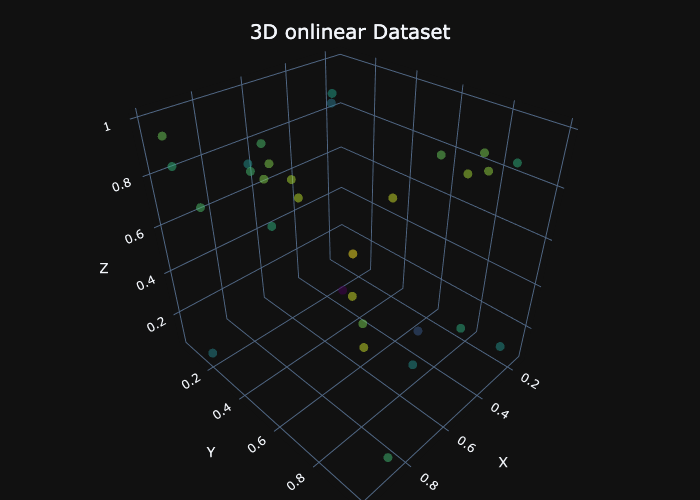

In [83]:
# Display the 3D scatter plot image
from src.utils.mermaid import display_image_from_file

display_image_from_file('../assets/images/scatter_plot_3d_nonlinear.png')

![Nonlinear Dataset](https://github.com/dellius-alexander/Neural-Networks-From-Scratch/blob/main/assets/images/scatter_plot_3d_nonlinear.png "Nonlinear Dataset")

In [84]:
# Now lets graph the 2D X, y coordinates
reshaped_X = X.reshape(-1, 3)
print(reshaped_X[:,0].shape)  # (300,)

# Graph the dataset
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=X_flat, y=y_flat, mode='markers',
        marker=dict(size=8, color=n_flat, opacity=0.8, colorscale='curl'), name='Dataset')
)

# Update the layout of the plot
fig.update_layout(
    title={
        'text': '2D Nonlinear Dataset',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 20  # Adjust the size as needed
        }
    },
    xaxis_title='X', 
    yaxis_title='Y',
    margin=dict(l=0, r=0, t=0, b=100)
)

# Save plot to file in png and svg format
fig.write_image('../assets/images/scatter_plot_2d_nonlinear.png')
fig.write_image('../assets/images/scatter_plot_2d_nonlinear.svg')

# Show the plot
fig.show()

(10,)


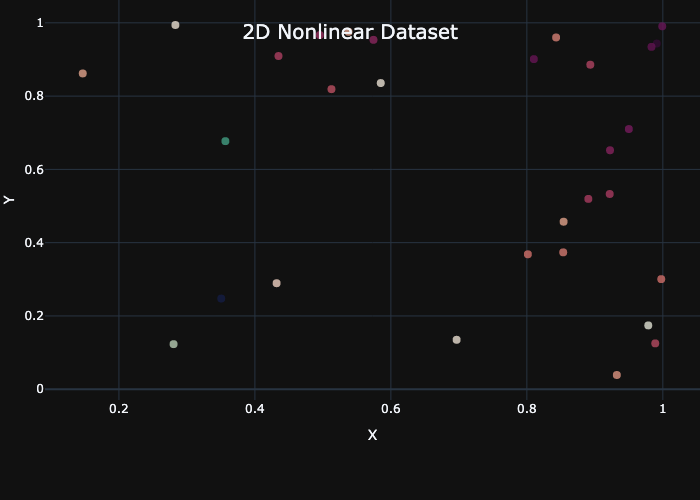

In [85]:
# Display the 2D nonlinear scatter plot image
from src.utils.mermaid import display_image_from_file

display_image_from_file('../assets/images/scatter_plot_2d_nonlinear.png')

In [86]:
"""
Colorscale properties: 
=====================

[
'aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
'ylorrd'
]
 """

"\nColorscale properties: \n=====================\n\n[\n'aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',\n'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',\n'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',\n'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',\n'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',\n'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',\n'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',\n'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',\n'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',\n'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',\n'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',\n'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',\n'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',\n'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',\n'ylorrd'\n]\n "

In [87]:
# Generate a spiral dataset
from src.utils.datasets import create_spiral_dataset

# Create a spiral dataset
X, y = create_spiral_dataset(100, 3)

print(X.shape)  # (100, 3)
print(y.shape)  # (100,)


(300, 2)
(300,)


In [88]:
# Graph the inputs
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=X[:,0], y=X[:,1], mode='markers', 
        marker=dict(size=8, color=y, opacity=0.8, colorscale='turbo'), name='Dataset'
    )
)

# Update the layout of the plot
fig.update_layout(
    title={
        'text': '2D Spiral Dataset',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 20  # Adjust the size as needed
        }
    },
    xaxis_title='X',
    yaxis_title='Y',
    margin=dict(l=0, r=0, t=0, b=0),  # Set margins to zero
    
)

# Save plot to file in png and svg format
fig.write_image('../assets/images/scatter_plot_2d_spiral.png')
fig.write_image('../assets/images/scatter_plot_2d_spiral.svg')

# Show the plot
fig.show()

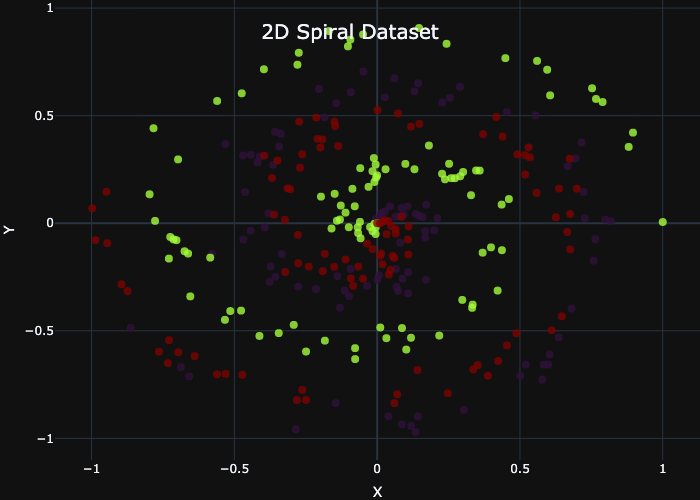

In [89]:
# Display the 3D scatter plot image
from src.utils.mermaid import display_image_from_file

display_image_from_file('../assets/images/scatter_plot_2d_spiral.png')

# Dense Layers

A dense layer is a layer of neurons where each neuron is connected to every neuron in the previous layer. The output of a dense layer is a list of predictions, one for each neuron in the layer. The output of a dense layer is calculated as follows:

---

$
\begin{align*}
\text{``Predictions``} &= \text{Activation Function}(\text{weights} \cdot \text{inputs} + \text{Bias}) \\
\text{``Predictions``} &= \text{Activation Function}(\text{weights}_1 \cdot \text{inputs}_1 + \text{weights}_2 \cdot \text{inputs}_2 + . . . + \text{weights}_n \cdot \text{inputs}_n + \text{Bias})
\end{align*}
$

---



In [90]:
# Simple dense layer with 2 inputs and 3 neurons; only one dense layer of 3 neurons
from src.layer.dense import Dense
from src.functions.activation import ReLU
from src.utils.datasets import create_spiral_dataset
from scipy.ndimage import zoom

# Create a spiral dataset
X, y = create_spiral_dataset(100, 3)
y = np.array([y])

print(f"Inputs: {X.shape}")
print(f"Y is a spiral dataset: {y.shape}")

# Initialize activation function
relu = ReLU()

# Create a dense layer with 2 inputs features and 3 neurons
dense = Dense(2, 3)

# Run the forward pass
dense.forward(X)

# Get the predictions
predictions = relu(dense.output)
print(f"Pre Resize Predictions: {predictions.shape}")
# Match the size of predictions to the size of y
# Calculate zoom factor
zoom_factor = np.array(y.shape) / np.array(predictions.shape)
# Resize the predictions
predictions = zoom(predictions, zoom_factor, order=3) # 'order=3' for cubic interpolation
# predictions = np.array([predictions[range(len(predictions)), y[0]]])
print(f"Post Resize Predictions: {predictions.shape}")
print(f"True labels: {y.shape}")

# Calculate the loss
avg_loss, loss = dense.loss(predictions, y)

# Log the outputs, weights and biases
print(f"Inputs: {X.shape}")
print(f"Weights: {dense.weights.shape}")
print(f"Biases: {dense.biases.shape}")
print(f"Output: {dense.output.shape}")
print(f"Predictions: {predictions.shape}")
print(f"Loss: {avg_loss}")


Inputs: (300, 2)
Y is a spiral dataset: (1, 300)
Pre Resize Predictions: (300, 3)
Post Resize Predictions: (1, 300)
True labels: (1, 300)
Inputs: (300, 2)
Weights: (2, 3)
Biases: (1, 3)
Output: (300, 3)
Predictions: (1, 300)
Loss: 0.12837334963468977


In [91]:
# Now we create a dense layer with 3 neurons with 2 inputs each and 2 dense layers; the first layer has 3 neurons with 2 inputs each and the second layer has 3 neurons with 3 inputs each.
from src.layer.dense import Dense
from src.utils.datasets import create_spiral_dataset
from src.functions.activation import Softmax, ReLU
from scipy.ndimage import zoom

# Initialize activation function
softmax = Softmax()
relu = ReLU()

# Create a spiral dataset
X, y = create_spiral_dataset(100, 3)
y = np.array([y])
print(f"Inputs: {X.shape}")
print(f"Y is a spiral dataset: {y.shape}")

# Create a dense layer with 3 neurons with 2 inputs each
dense = Dense(2, 3)

# Lets do the forward pass
dense.forward(X)
print(f"Weights Layer 1: {dense.weights.shape}")
print(f"Biases Layer 1: {dense.biases.shape}")
print(f"Output Layer 1: {dense.output.shape}")

# Run the activation function ReLU
dense_output = relu(dense.output)

# Create a dense layer with 3 neurons with 3 inputs each
dense2 = Dense(3, 3)

# Lets do the forward pass
dense2.forward(dense_output)
print(f"Weights Layer 2: {dense2.weights.shape}")
print(f"Biases Layer 2: {dense2.biases.shape}")
print(f"Output Layer 2: {dense2.output.shape}")

# TODO: These final outputs are also our “confidence scores.” The higher the confidence score, the more confident the model is that the input belongs to that class.

# Run the activation function ReLU
predictions = softmax(dense2.output)
print(f"Pre Resize Predictions: {predictions.shape}")

# Match the size of predictions to the size of y
# Calculate zoom factor
zoom_factor = np.array(y.shape) / np.array(predictions.shape)
# Resize the predictions
predictions = zoom(predictions, zoom_factor, order=3) # 'order=3' for cubic interpolation
# predictions = np.array([predictions[range(len(predictions)), y[0]]])
print(f"Post Resize Predictions: {predictions.shape}")
print(f"True labels shape: {y.shape}")
print(f"Predictions Data[:1,0]: \n{predictions[:1,0]}")

# Calculate the loss and print the results to 7 decimal places
avg_loss, loss = dense2.loss(predictions, y)
print(f"Loss: {avg_loss:.7f}") # Loss: 5.7037784
print(f"Loss Data Shape: \n{loss.shape}")

# Run ArgMax to get the predicted class
predicted_class = np.argmax(predictions, axis=0)
print(f"Predicted Class Shape: {predicted_class.shape}")
print(f"Predicted Class Data: {predictions[:,predicted_class[0]]}")

Inputs: (300, 2)
Y is a spiral dataset: (1, 300)
Weights Layer 1: (2, 3)
Biases Layer 1: (1, 3)
Output Layer 1: (300, 3)
Weights Layer 2: (3, 3)
Biases Layer 2: (1, 3)
Output Layer 2: (300, 3)
Pre Resize Predictions: (300, 3)
Post Resize Predictions: (1, 300)
True labels shape: (1, 300)
Predictions Data[:1,0]: 
[0.00333317]
Loss: 0.1275397
Loss Data Shape: 
(1, 300)
Predicted Class Shape: (300,)
Predicted Class Data: [0.00333317]


In [92]:
# Graph the predictions
import plotly.graph_objects as go
from src.utils.plot import get_camera_view
# Graph the X inputs and y labels
fig = go.Figure()

# Reshape the arrays
X = X.reshape(-1, 2)
z = predictions.reshape(-1,)
print(f"Inputs was reshaped to (-1, 2): {X.shape}")
print(f"Predictions was reshaped to (-1, 1): {z.shape}")

# Add scatter plot for true values
fig.add_trace(
    go.Scatter3d(
        name='Predictions',
        x=X[:,0], 
        y=X[:,1], 
        z=z, 
        mode='markers', 
        marker=dict(
            size=5, 
            color=z, 
            opacity=0.8, 
            colorscale='turbo'
        )
    )
)

# Set the camera view (orientation)
camera = get_camera_view('default')

# Adjust the camera view
fig.update_layout(scene_camera=camera)

# Set plot title and labels
fig.update_layout(
    title={
        'text': '3D Scatter Plot of Predictions, and True Values',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 20  # Adjust the size as needed
        }
    },
    margin=dict(l=0, r=0, t=0, b=0),
    scene=dict(
        xaxis_title='Inputs Feature 1', 
        yaxis_title='Inputs Feature 1', 
        zaxis_title='Values'),
    
)

# Save plot to file
fig.write_image('../assets/images/spiral_scatter_plot_3d_true_values.png')
fig.write_image('../assets/images/spiral_scatter_plot_3d_true_values.svg')

# Display the plot
fig.show()


Inputs was reshaped to (-1, 2): (300, 2)
Predictions was reshaped to (-1, 1): (300,)


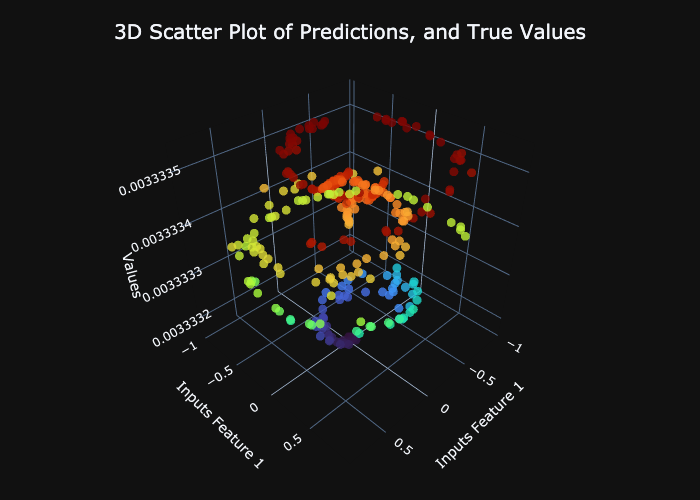

In [93]:
# Display the 3D scatter plot image
from src.utils.mermaid import display_image_from_file

display_image_from_file('../assets/images/spiral_scatter_plot_3d_true_values.png')

In [94]:
# Graph the predictions
import plotly.graph_objects as go
from src.utils.plot import get_camera_view
# Graph the X inputs and y labels
fig = go.Figure()

# Reshape the arrays
X = X.reshape(-1, 2)
y = y.reshape(-1)
z = predictions.reshape(-1,)
loss = loss.reshape(-1,)
print(f"Inputs was reshaped to (-1, 2): {X.shape}")
print(f"Truth values was reshaped to (-1,): {y.shape}")
print(f"Predictions was reshaped to (-1, 1): {z.shape}")
print(f"Loss has to be reshaped to (-1,) match the indexes of the input: {loss.shape}")

# Add scatter plot for errors
fig.add_trace(
    go.Scatter3d(
        name='Errors',
        x=X[:,0], 
        y=X[:,1], 
        z=loss, 
        mode='markers', 
        marker=dict(
            size=5, 
            color=loss, 
            opacity=0.8, 
            colorscale='turbo'
        )
    )
)

# TODO: Set the camera view (orientation)
camera = get_camera_view('default')

# Adjust the camera view
fig.update_layout(scene_camera=camera)

# Set plot title and labels
fig.update_layout(
    title={
        'text': '3D Scatter Plot of Errors',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 20  # Adjust the size as needed
        }
    },
    margin=dict(l=0, r=0, t=0, b=0),
    scene=dict(
        xaxis_title='Inputs Feature 1', 
        yaxis_title='Inputs Feature 2', 
        zaxis_title='Values'),
    
)

# Save plot to file
fig.write_image('../assets/images/spiral_scatter_plot_3d_error_values.png')
fig.write_image('../assets/images/spiral_scatter_plot_3d_error_values.svg')

# Display the plot
fig.show()


Inputs was reshaped to (-1, 2): (300, 2)
Truth values was reshaped to (-1,): (300,)
Predictions was reshaped to (-1, 1): (300,)
Loss has to be reshaped to (-1,) match the indexes of the input: (300,)


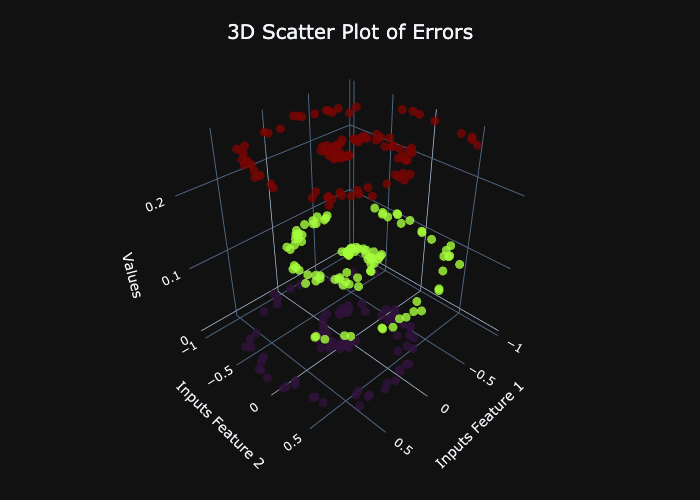

In [95]:
# Display the 3D scatter plot image
from src.utils.mermaid import display_image_from_file

display_image_from_file('../assets/images/spiral_scatter_plot_3d_error_values.png')